In [1]:
from google.colab import files
newFile= files.upload()

Saving Telco-Customer-Churn_Excel Version.xlsx to Telco-Customer-Churn_Excel Version.xlsx


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[937  99]
 [152 221]]

Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.69      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



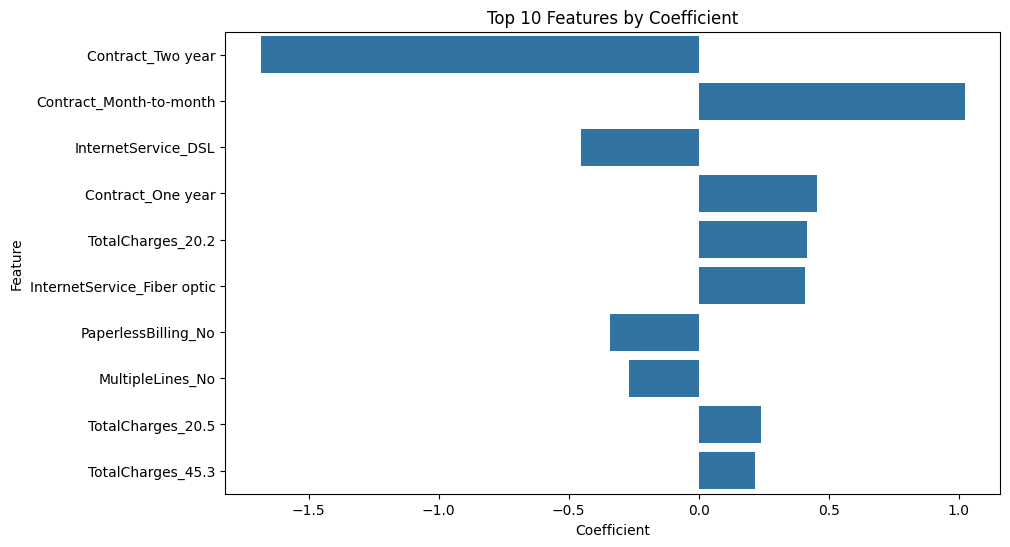

In [2]:
# Import relevant libraries for logistic regression models and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Read the dataset
telco_Churn = pd.read_excel("Telco-Customer-Churn_Excel Version.xlsx")

# Define features and target
X = telco_Churn.drop(columns=["customerID", "Churn"])  # Adjust feature selection if necessary
y = telco_Churn['Churn']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Access the coefficients
coefficient = model.coef_[0]

# Create a dataframe to associate features with coefficients
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficient})

# Calculate the odds ratio
coef_df["Odds Ratio"] = np.exp(coef_df["Coefficient"]).round(4)

# Sort the dataframe by absolute value of coefficient
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

# Make predictions on the test set
y_predict = model.predict(X_test)

# Evaluate the model
confusion = confusion_matrix(y_test, y_predict)
classification = classification_report(y_test, y_predict)
print("Confusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification)

# Visualize coefficients if needed
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title('Top 10 Features by Coefficient')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
